In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# DB接続
conn = sqlite3.connect("baitoru_jobs.db")

df = pd.read_sql_query("""
SELECT
    min_hourly_wage,
    nearest_station
FROM jobs
WHERE min_hourly_wage IS NOT NULL
""", conn)

conn.close()

# 確認
print(df.head())
print(df.describe())


   min_hourly_wage nearest_station
0             5000             上野駅
1             4500             上野駅
2             5000             新橋駅
3             1600             品川駅
4             1714             新宿駅
       min_hourly_wage
count      1000.000000
mean       1502.136000
std         506.712594
min          50.000000
25%        1300.000000
50%        1370.000000
75%        1500.000000
max        5000.000000


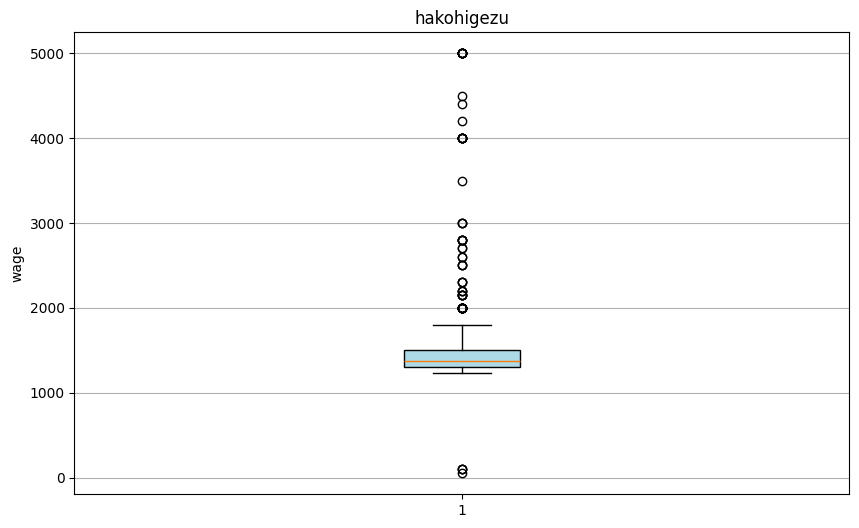

In [5]:
#箱ひげ図
plt.figure(figsize=(10, 6))
plt.boxplot(df['min_hourly_wage'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('hakohigezu')
plt.ylabel('wage')
plt.grid(axis='y')
plt.show()

In [8]:
#山手線の駅
yamanote_stations = ['東京駅', '神田駅', '秋葉原駅', '御徒町駅', '上野駅', '鶯谷駅', '日暮里駅', '西日暮里駅','田端駅', '駒込駅', '巣鴨駅', '大塚駅', '池袋駅', '目白駅', '高田馬場駅', '新大久保駅','新宿駅', '代々木駅', '原宿駅', '渋谷駅', '恵比寿駅', '目黒駅', '五反田駅', '大崎駅','品川駅', '高輪ゲートウェイ駅', '田町駅', '浜松町駅', '新橋駅', '有楽町駅'
]
yamanote_df = df[df['nearest_station'].isin(yamanote_stations)]
station_counts = yamanote_df['nearest_station'].value_counts().reindex(yamanote_stations, fill_value=0)

print(station_counts.sort_values(ascending=False))

nearest_station
新宿駅          179
渋谷駅          132
池袋駅          107
東京駅           72
秋葉原駅          65
新橋駅           61
上野駅           40
恵比寿駅          40
有楽町駅          38
品川駅           35
御徒町駅          22
五反田駅          22
原宿駅           21
神田駅           21
高田馬場駅         14
西日暮里駅         13
日暮里駅          12
田町駅           12
新大久保駅         11
目黒駅           10
大崎駅            8
巣鴨駅            6
浜松町駅           6
大塚駅            5
目白駅            4
駒込駅            3
鶯谷駅            2
代々木駅           0
高輪ゲートウェイ駅      0
田端駅            0
Name: count, dtype: int64


In [15]:
#10件以下の駅を除外した上位10駅の平均時給
filtered_counts = station_counts[station_counts > 10]
top10_stations = filtered_counts.head(10).index
top10_avg_wages = yamanote_df[yamanote_df['nearest_station'].isin(top10_stations)].groupby('nearest_station')['min_hourly_wage'].mean()
#テキスト表示
for station, avg_wage in top10_avg_wages.items():
    print(f"{station}: {avg_wage:.2f}円")



上野駅: 1707.70円
御徒町駅: 1424.09円
新大久保駅: 1343.64円
日暮里駅: 1392.33円
東京駅: 1453.29円
池袋駅: 1649.07円
神田駅: 1510.48円
秋葉原駅: 1481.32円
西日暮里駅: 1552.00円
高田馬場駅: 1590.21円


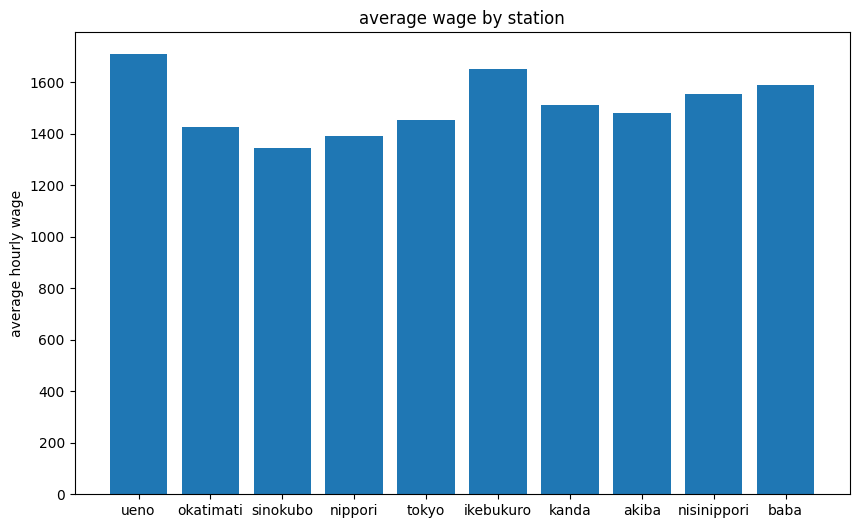

In [23]:
#top10の平均時給の棒グラフ表示（文字が重なるため略称）
top10_avg_wages = {"ueno": 1707.70, "okatimati": 1424.09, "sinokubo": 1343.64, "nippori": 1392.33, "tokyo": 1453.29, "ikebukuro": 1649.07, "kanda": 1510.48, "akiba": 1481.32, "nisinippori": 1552.00, "baba": 1590.21}
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top10_avg_wages.keys(), top10_avg_wages.values())
plt.ylabel("average hourly wage")
plt.title("average wage by station")
plt.show()

In [ ]:
#タグごとの平均時給
conn = sqlite3.connect("baitoru_jobs.db")
df = pd.read_sql("SELECT min_hourly_wage, tags FROM jobs", conn)
conn.close()

#tagsをリストに変換
df["tags"] = df["tags"].apply(eval)

#タグを1行ずつに展開
df_exploded = df.explode("tags")

result = (
    df_exploded
    .dropna(subset=["tags", "min_hourly_wage"])
    .groupby("tags")["min_hourly_wage"]
    .mean()
    .sort_values(ascending=False)
)

print(result)


tags
日払い      1832.850622
週1〜OK    1596.587302
シフト相談    1506.586696
未経験OK    1500.040900
～6h/日    1492.345845
～4h/日    1491.500000
学生       1490.975845
Name: min_hourly_wage, dtype: float64
